In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

### häufigste Wortfrequenz nach Modalwert

In [70]:
def tokenize(lines, pattern=re.compile(r'\p{L}+')):
    """

    :param lines: object to be tokenized, e.g. file
    :param pattern: pattern to tokenize 'lines'
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, pattern.findall(line))

# def remove_stopwords(tokens):
#     return (token for token in tokenize(tokens) if token not in set(stopwords.words('german')))


def wordcounts_in_file(file):
    """

    :param file: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(file, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))


def word2freq(counts):
    """

    :param counts: a Counter from a file to be analyzed
    :return: list of each words and their frequencies
    """
    words = []
    freq = []
    for c in counts:
        words.append(c)
        freq.append(counts[c])
    return words, freq


def create_pd_series():
    """

    :param path: path to files
    :param prefix: prefix to remove from filename for further use in Series
    :return: list of pd.Series with words and wordcounts per file
    """
    freq_list = []
    for file in glob.glob(path):
        filename = file.replace(prefix, '')
        counts = wordcounts_in_file(file)
        words, freq = word2freq(counts)
        freq_list.append(pd.Series(freq, words, name=filename))
        print(filename)  # später löschen
    return freq_list


def create_dataframe(series):
    """

    :param series: list of pd.Series, created e.g. with create_pd_series()
    :param mfw: value of most frequent words
    :return: document-term-matrix as pd.Dataframe with zscores
    """
    df = pd.DataFrame(series)
    df = df.fillna(0)

  #  df = df.div(df.sum(axis=1), axis=0)

    df.loc['Total_per_word'] = df.sum()
    df = df.sort_values(by='Total_per_word', axis=1, ascending=False)
    return df

In [71]:
path = "German/*.txt"
prefix = "German/"
freqs = create_pd_series()

Schopenhauer,-Johanna_Richard Wood.txt
Kafka,-Franz_Amerika.txt
Francois,-Louise-von_Stufenjahre eines Gluecklichen.txt
Spielhagen,-Friedrich_Hammer und Amboá.txt
Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt
Wassermann,-Jakob_Das Gaensemaennchen.txt
Wieland,-Christoph-Martin_Aristipp und einige seiner Zeitgenossen.txt
Kafka,-Franz_Der Prozess.txt
Marlitt,-Eugenie_Die Frau mit den Karfunkelsteinen.txt
Fouque,-Caroline-de-la-Motte_Magie der Natur.txt
Huber,-Therese_Ellen Percy.txt
May,-Karl_Im Reiche des silbernen Loewen I.txt
Fouque,-Caroline-de-la-Motte_Die Frau des Falkensteins.txt
Marlitt,-Eugenie_Das Geheimnis der alten Mamsell.txt
Arnim,-Ludwig-Achim-von_Armut Reichtum Schuld und Busse der Graefin Dolores.txt
Dohm,-Hedwig_Christa Ruland.txt
Keller,-Gottfried_Das Sinngedicht.txt
Freytag,-Gustav_Die verlorene Handschrift.txt
Gutzkow,-Karl_Wally die Zweiflerin.txt
Hahn-Hahn,-Ida-Graefin-von_Maria Regina.txt
Ebner-Eschenbach,-Marie-von_Bozena.txt
Fontane,-Theodor_Irrungen Wirrunge

In [72]:
fre = create_dataframe(freqs)
fre

,und,die,der,sie,in,zu,ich,er,den,das,...,proselytenmachers,näselnder,zugeleimt,weltehre,krümmet,fallest,hierophant,verdrehend,kraß,tractats
"Schopenhauer,-Johanna_Richard Wood.txt",2870.0,2196.0,2209.0,1434.0,1939.0,2274.0,1106.0,1650.0,1081.0,1016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Kafka,-Franz_Amerika.txt",2476.0,1975.0,1966.0,1349.0,1122.0,1174.0,977.0,1571.0,960.0,939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Francois,-Louise-von_Stufenjahre eines Gluecklichen.txt",4615.0,4285.0,4676.0,2336.0,2784.0,1985.0,1107.0,2485.0,1973.0,2050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Spielhagen,-Friedrich_Hammer und Amboá.txt",8815.0,6672.0,7059.0,4222.0,4533.0,3826.0,7760.0,2937.0,3412.0,3314.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",570.0,333.0,236.0,572.0,213.0,329.0,863.0,221.0,140.0,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Lewald,-Fanny_Jenny.txt",3133.0,2429.0,2046.0,2424.0,1471.0,2085.0,1198.0,1314.0,1010.0,1206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Raabe,-Wilhelm_Stopfkuchen Eine See- und Mordgeschichte.txt",2675.0,1218.0,1549.0,540.0,887.0,769.0,1243.0,571.0,768.0,737.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Schopenhauer,-Johanna_Die Tante.txt",3172.0,2592.0,2432.0,2029.0,2020.0,2574.0,1800.0,1433.0,1165.0,1154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Wieland,-Christoph-Martin_Geschichte des Agathon.txt",4310.0,4814.0,4019.0,2140.0,2657.0,4419.0,1154.0,2272.0,2013.0,1071.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
summe = fre.loc['Total_per_word'].sum()
summe

10348501.0

### Ein-, zwei- und dreimal verwendete Wörter

In [7]:
df = pd.DataFrame(fre.loc['Total_per_word'].value_counts().tolist()/summe)
df.index = fre.loc['Total_per_word'].value_counts().index
df = df[:3]
df['corpus'] = 'German'
df

,0,corpus
1.0,0.011376,German
2.0,0.003019,German
3.0,0.001560,German


### most frequent words with and without stopwords by relative frequencies

In [13]:
fischer = fre.copy()
fischer = fischer[fischer.index.str.contains('Fischer')]
# fischer.index = fischer['Unnamed: 0']
# fischer.drop('Unnamed: 0', inplace=True, axis=1)
fischer.loc['Summen'] = (fischer.sum(axis=0))
fischer['Total_per_text'] = fischer.sum(axis=1)
fischer

,und,die,der,sie,in,zu,ich,er,den,das,...,näselnder,zugeleimt,weltehre,krümmet,fallest,hierophant,verdrehend,kraß,tractats,Total_per_text
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",570.0,333.0,236.0,572.0,213.0,329.0,863.0,221.0,140.0,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19818.0
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",866.0,513.0,455.0,751.0,337.0,516.0,1186.0,388.0,216.0,354.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33521.0
"Fischer,-Caroline-Auguste_Margarethe.txt",1324.0,673.0,532.0,958.0,322.0,510.0,1377.0,524.0,206.0,511.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37924.0
Summen,2760.0,1519.0,1223.0,2281.0,872.0,1355.0,3426.0,1133.0,562.0,1084.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91263.0


In [14]:
komplett = fischer['Total_per_text']['Summen']
fischer.drop('Total_per_text', axis=1, inplace=True)
fischer = fischer.T
fischer['rel_sum'] = fischer['Summen']/komplett
fischer = fischer.sort_values(by=['rel_sum'], ascending=False)
#huber = huber[:20]   # uncomment for vis
fischer.T

,ich,und,sie,die,nicht,es,zu,der,er,das,...,hervorgetrieben,fortgestoßen,zuströmende,jammernde,kreditbriefe,gezwungner,lehrgebäude,uebertragung,entfesseln,tractats
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",863.00000,570.000000,572.000000,333.000000,238.000000,221.000000,329.000000,236.000000,221.000000,219.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",1186.00000,866.000000,751.000000,513.000000,560.000000,530.000000,516.000000,455.000000,388.000000,354.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fischer,-Caroline-Auguste_Margarethe.txt",1377.00000,1324.000000,958.000000,673.000000,630.000000,657.000000,510.000000,532.000000,524.000000,511.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,3426.00000,2760.000000,2281.000000,1519.000000,1428.000000,1408.000000,1355.000000,1223.000000,1133.000000,1084.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.03754,0.030242,0.024994,0.016644,0.015647,0.015428,0.014847,0.013401,0.012415,0.011878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_h = fischer.copy().T
for x in ohne_stop_h:
    if x in stopwords:
        ohne_stop_h.drop(x, axis=1, inplace=True)
ohne_stop_h

,mutter,rief,brief,herz,julie,reinhold,olivier,wilhelmine,herzliebste,augen,...,hervorgetrieben,fortgestoßen,zuströmende,jammernde,kreditbriefe,gezwungner,lehrgebäude,uebertragung,entfesseln,tractats
"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt",12.000000,76.000000,1.000000,26.000000,0.000000,0.000000,0.00000,0.000000,0.000000,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fischer,-Caroline-Auguste_Die Honigmonathe.txt",52.000000,24.000000,150.000000,44.000000,122.000000,100.000000,94.00000,90.000000,0.000000,28.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Fischer,-Caroline-Auguste_Margarethe.txt",141.000000,94.000000,4.000000,60.000000,0.000000,0.000000,0.00000,0.000000,86.000000,27.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,205.000000,194.000000,155.000000,130.000000,122.000000,100.000000,94.00000,90.000000,86.000000,85.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.002246,0.002126,0.001698,0.001424,0.001337,0.001096,0.00103,0.000986,0.000942,0.000931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ohne_stop_h = ohne_stop_h.T
ohne_stop_h = ohne_stop_h.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_h = ohne_stop_h[:20]

In [18]:
ohne_stop_h

,"Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt","Fischer,-Caroline-Auguste_Die Honigmonathe.txt","Fischer,-Caroline-Auguste_Margarethe.txt",Summen,rel_sum
mutter,12.0,52.0,141.0,205.0,0.002246
rief,76.0,24.0,94.0,194.0,0.002126
brief,1.0,150.0,4.0,155.0,0.001698
herz,26.0,44.0,60.0,130.0,0.001424
julie,0.0,122.0,0.0,122.0,0.001337
reinhold,0.0,100.0,0.0,100.0,0.001096
olivier,0.0,94.0,0.0,94.0,0.001030
wilhelmine,0.0,90.0,0.0,90.0,0.000986
herzliebste,0.0,0.0,86.0,86.0,0.000942
augen,30.0,28.0,27.0,85.0,0.000931


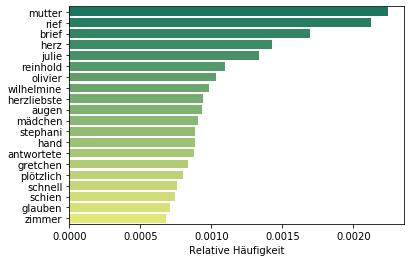

In [21]:
ax = sns.barplot(x=ohne_stop_h['rel_sum'], y=ohne_stop_h.index, data=ohne_stop_h, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('MFW_Fischer_mit_stop')

In [25]:
fre[fre.index.str.contains('Fischer')]['mutter']

Fischer,-Caroline-Auguste_Gustavs Verirrungen.txt     12.0
Fischer,-Caroline-Auguste_Die Honigmonathe.txt        52.0
Fischer,-Caroline-Auguste_Margarethe.txt             141.0
Name: mutter, dtype: float64

In [35]:
marlitt = fre.copy()
marlitt = marlitt[marlitt.index.str.contains('Marlitt')]
# # goethe.loc['Summe'] = goethe.sum()
# marlitt.index = marlitt['Unnamed: 0']
# marlitt.drop('Unnamed: 0', inplace=True, axis=1)
marlitt.loc['Summen'] = (marlitt.sum(axis=0))
marlitt['Total_per_text'] = marlitt.sum(axis=1)
marlitt

,und,die,der,sie,in,zu,ich,er,den,das,...,näselnder,zugeleimt,weltehre,krümmet,fallest,hierophant,verdrehend,kraß,tractats,Total_per_text
"Marlitt,-Eugenie_Die Frau mit den Karfunkelsteinen.txt",3511.0,2992.0,2402.0,1795.0,1478.0,967.0,899.0,1184.0,1336.0,1534.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95841.0
"Marlitt,-Eugenie_Das Geheimnis der alten Mamsell.txt",2836.0,2675.0,2025.0,2205.0,1444.0,888.0,933.0,1017.0,1150.0,1483.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88922.0
"Marlitt,-Eugenie_Goldelse.txt",3074.0,2788.0,2150.0,2342.0,1506.0,1272.0,1018.0,1166.0,1293.0,1468.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99986.0
Summen,9421.0,8455.0,6577.0,6342.0,4428.0,3127.0,2850.0,3367.0,3779.0,4485.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,284749.0


In [36]:
komplett = marlitt['Total_per_text']['Summen']
marlitt.drop('Total_per_text', axis=1, inplace=True)
marlitt = marlitt.T
marlitt['rel_sum'] = marlitt['Summen']/komplett
marlitt = marlitt.sort_values(by=['rel_sum'], ascending=False)
marlitt.T

,und,die,der,sie,das,in,den,er,zu,ich,...,holzhaufen,erntepredigt,hinaufrufen,losziehen,usurpatoren,gruppierungen,anschwellende,okkupiert,pharmazeutischen,tractats
"Marlitt,-Eugenie_Die Frau mit den Karfunkelsteinen.txt",3511.000000,2992.000000,2402.000000,1795.000000,1534.000000,1478.000000,1336.000000,1184.000000,967.000000,899.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Marlitt,-Eugenie_Das Geheimnis der alten Mamsell.txt",2836.000000,2675.000000,2025.000000,2205.000000,1483.000000,1444.000000,1150.000000,1017.000000,888.000000,933.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Marlitt,-Eugenie_Goldelse.txt",3074.000000,2788.000000,2150.000000,2342.000000,1468.000000,1506.000000,1293.000000,1166.000000,1272.000000,1018.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,9421.000000,8455.000000,6577.000000,6342.000000,4485.000000,4428.000000,3779.000000,3367.000000,3127.000000,2850.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.033085,0.029693,0.023098,0.022272,0.015751,0.015551,0.013271,0.011824,0.010982,0.010009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
with open('de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_m = marlitt.copy().T
for x in ohne_stop_m:
    if x in stopwords:
        ohne_stop_m.drop(x, axis=1, inplace=True)
ohne_stop_m

,augen,elisabeth,hand,mädchen,gesicht,felicitas,junge,alte,rief,kind,...,holzhaufen,erntepredigt,hinaufrufen,losziehen,usurpatoren,gruppierungen,anschwellende,okkupiert,pharmazeutischen,tractats
"Marlitt,-Eugenie_Die Frau mit den Karfunkelsteinen.txt",159.000000,1.000000,149.000000,130.000000,111.000000,0.000000,119.000000,159.000000,86.000000,125.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Marlitt,-Eugenie_Das Geheimnis der alten Mamsell.txt",173.000000,0.000000,157.000000,135.000000,173.000000,399.000000,134.000000,114.000000,103.000000,152.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Marlitt,-Eugenie_Goldelse.txt",156.000000,479.000000,146.000000,157.000000,119.000000,0.000000,129.000000,81.000000,154.000000,64.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,488.000000,480.000000,452.000000,422.000000,403.000000,399.000000,382.000000,354.000000,343.000000,341.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rel_sum,0.001714,0.001686,0.001587,0.001482,0.001415,0.001401,0.001342,0.001243,0.001205,0.001198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
ohne_stop_m = ohne_stop_m.T
ohne_stop_m = ohne_stop_m.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_m = ohne_stop_m[:20]

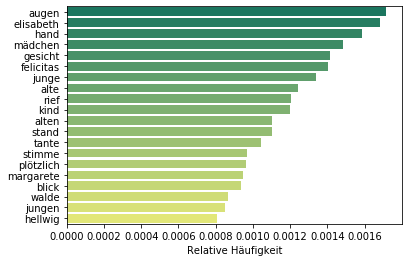

In [74]:
ax = sns.barplot(x=ohne_stop_m['rel_sum'], y=ohne_stop_m.index, data=ohne_stop_m, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('MFW_Marlitt_mit_stop')

In [78]:
fre['Total_per_text'] = fre.sum(axis=1)
fre.drop('Total_per_word', axis=0, inplace=True)

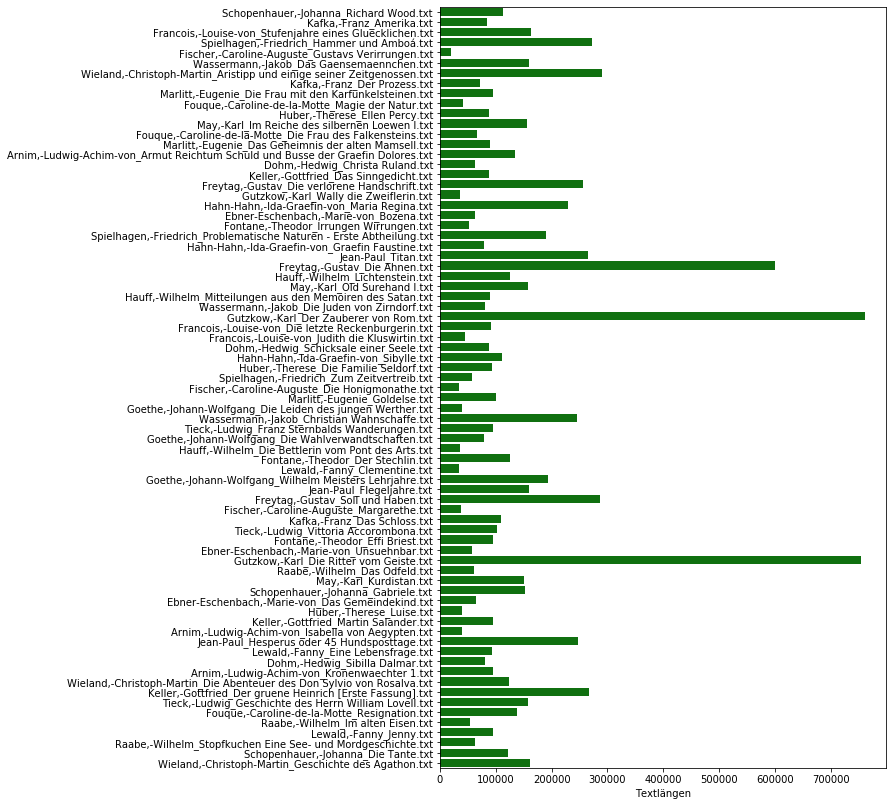

In [79]:
plt.figure(figsize=(8,14))
ax = sns.barplot(x=fre.Total_per_text, y=fre.index, data=fre, color='g')
ax.set(xlabel='Textlängen')
plt.savefig('textlängen')

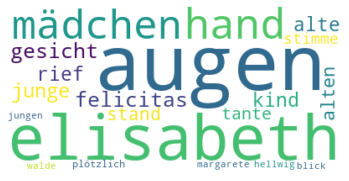

In [98]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = ohne_stop_m['rel_sum']
# text = abba.any()
makeImage(text, "wordcloud_narlitt")

In [88]:
m = marlitt[:2000]
f = fischer[:2000]

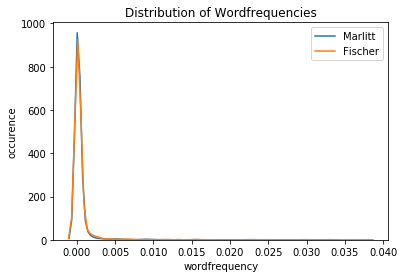

In [90]:
ax = sns.distplot(m['rel_sum'], hist=False, label="Marlitt")
ax = sns.distplot(f['rel_sum'], hist=False, label="Fischer")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

### compare delta values for texts by same and different authors

In [155]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

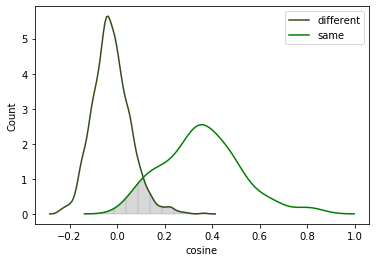

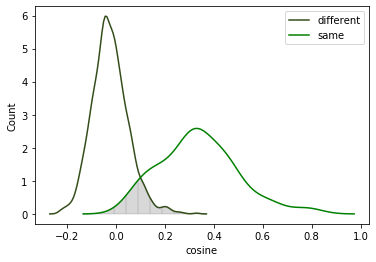

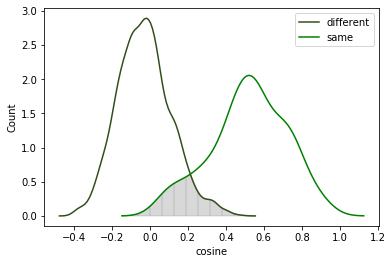

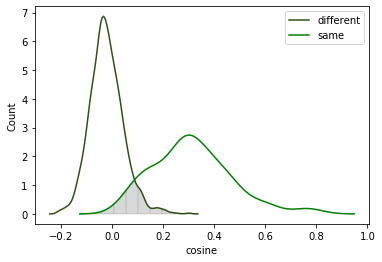

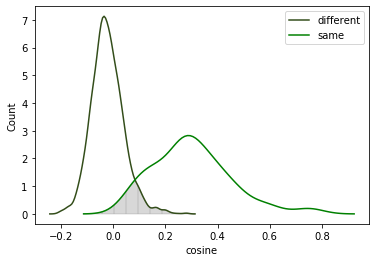

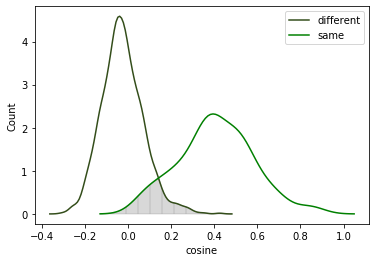

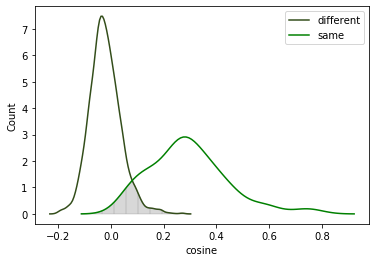

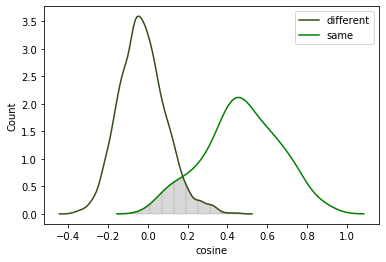

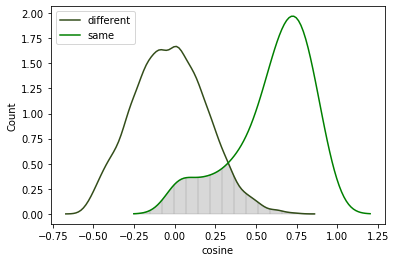

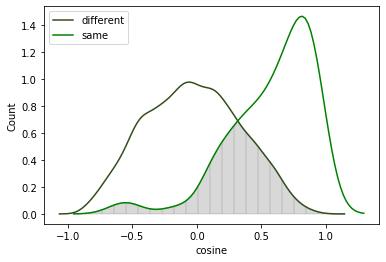

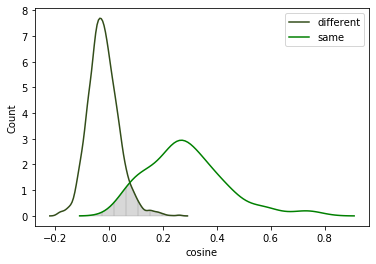

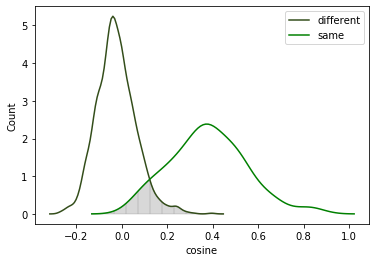

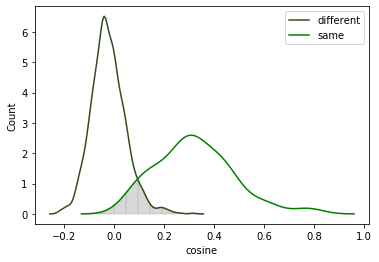

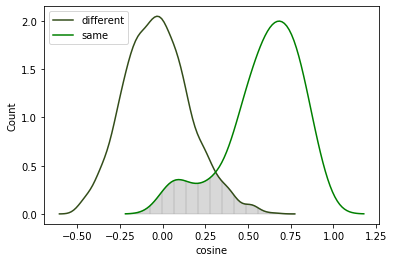

In [156]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


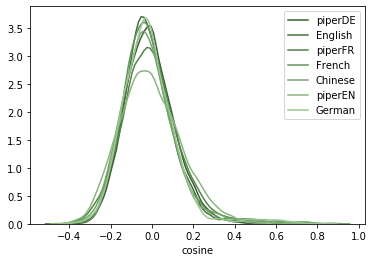

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [86]:
var = pd.read_hdf("project_stylometry_statistics/results/Chinese/delta/1000_delta_Chinese.h5")
v = var.copy()
v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,manhattan,cosine,euclidean,label,author
"BiShuMin,HuaGuanBingDu,seg.txt",0.00,0.00,0.00,same,BiShuMin
"BiShuMin,LanSeTianTang,seg.txt",589.27,0.49,30.22,same,BiShuMin
"YvQiuyv,ShuangLengChangHe,seg.txt",751.50,0.73,36.28,different,YvQiuyv
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",751.84,0.80,36.84,different,LongYingtai
"YvQiuyv,XingZheWuJiang,seg.txt",758.32,0.76,36.53,different,YvQiuyv
...,...,...,...,...,...
"ZhouRuchang,HongLouShiErCeng,seg.txt",1049.81,1.11,49.20,different,ZhouRuchang
"ZhouGuoping,ShouWangDeJuLi,seg.txt",1050.02,1.13,48.56,different,ZhouGuoping
"ZhouRuchang,HongLouBieYangHong,seg.txt",1057.65,1.10,48.87,different,ZhouRuchang
"ZhouGuoping,LingHunZhiNengDuXing,seg.txt",1066.59,1.13,48.77,different,ZhouGuoping


In [58]:
#variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,corpus
1,0.60,piperDE
2,0.75,piperDE
3,0.71,piperDE
4,0.75,piperDE
5,0.78,piperDE
...,...,...
5620,1.11,Chinese
5621,1.13,Chinese
5622,1.10,Chinese
5623,1.13,Chinese


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


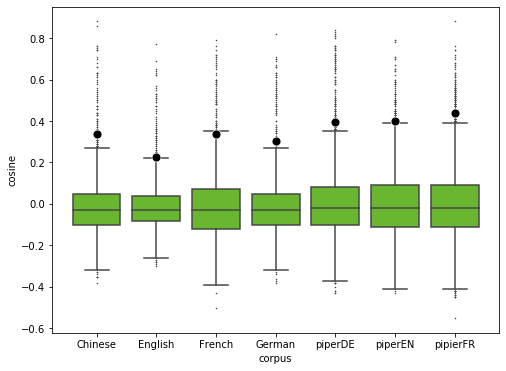

In [14]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='corpus', y='cosine', data=vdelta, color=(0.4, 0.8, 0.1), fliersize=0.5)
ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [9]:
cos = pd.read_hdf("../results/German/delta/1000_delta_German.h5")
cos = cos[cos.cosine!=1.00]

In [10]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.6191277293757895 0.33281671506865484 0.08468876630119851 -0.13606131532080637


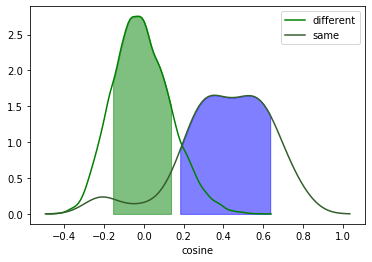

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


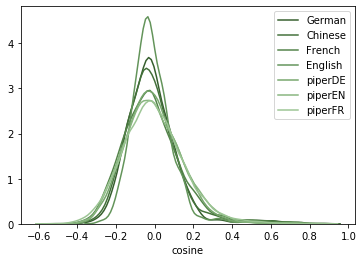

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

#### PCA

In [7]:
path = '../corpus/alles/*.txt'
prefix = '../corpus/alles/'
    
text_list = []
for file in glob.glob(path):
    filename = file.replace(prefix, '').replace('.txt', '')
    with open(file, 'r') as f:
        data = f.read().replace('\n', ' ')        
    text_list.append(pd.Series(data, name=filename))

prosa = pd.DataFrame(text_list)
prosa.head()

,0
lyrik_l00180180,Die Armuth gab ihm dieses Leben Zur Armuth und...
lyrik_l00180195,"Mit Klagen wein' ich des Menschen Loos, Denn m..."
lyrik_l00180199,Er stand vor einer Schmiede tief im Walde Und ...
lyrik_l00180088,"Was gestern noch geblühet, Ist heute schon ver..."
epik_mann_venedig,Thomas Mann Der Tod in Venedig Erstes Kapit...


In [14]:
prosa['genre'] = '0'
prosa['titel'] = '0'

for i, row in prosa.iterrows():
    row['genre'] = i.split("_")[0]
    row['titel'] = i.split("_")[:]
prosa = prosa.rename(columns={0: "text"})
prosa.head()

,text,genre,titel
lyrik_l00180180,Die Armuth gab ihm dieses Leben Zur Armuth und...,lyrik,"[lyrik, l00180180]"
lyrik_l00180195,"Mit Klagen wein' ich des Menschen Loos, Denn m...",lyrik,"[lyrik, l00180195]"
lyrik_l00180199,Er stand vor einer Schmiede tief im Walde Und ...,lyrik,"[lyrik, l00180199]"
lyrik_l00180088,"Was gestern noch geblühet, Ist heute schon ver...",lyrik,"[lyrik, l00180088]"
epik_mann_venedig,Thomas Mann Der Tod in Venedig Erstes Kapit...,epik,"[epik, mann, venedig]"


In [15]:
for i,row in prosa.iterrows():
    row.text = row.text.lower()
prosa.head()

,text,genre,titel
lyrik_l00180180,die armuth gab ihm dieses leben zur armuth und...,lyrik,"[lyrik, l00180180]"
lyrik_l00180195,"mit klagen wein' ich des menschen loos, denn m...",lyrik,"[lyrik, l00180195]"
lyrik_l00180199,er stand vor einer schmiede tief im walde und ...,lyrik,"[lyrik, l00180199]"
lyrik_l00180088,"was gestern noch geblühet, ist heute schon ver...",lyrik,"[lyrik, l00180088]"
epik_mann_venedig,thomas mann der tod in venedig erstes kapit...,epik,"[epik, mann, venedig]"


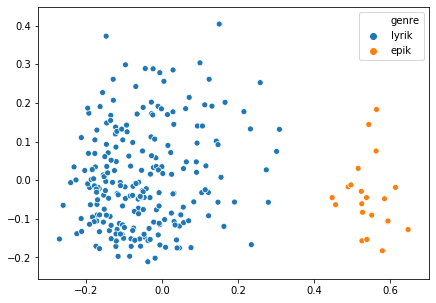

In [20]:
x = TfidfVectorizer().fit_transform(prosa.text)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)
pca = PCA(n_components=2)
X_tf = pca.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue=prosa.genre, marker="o")

plt.savefig('../results/PCA_genres.png', bbox_inches = "tight")